# Handout #1: Instance-based Learning

## Problem 1

Given dataset ds011.txt:

a) Solve for the SVM analytically using the Karush-Kuhn-Tucker conditions and the Wolfe dual representation
making use of a quadratic programming solver and

1. find and report the support vectors 
(NOTE: due to round-off errors, 
it is likely none of the $\lambda_i$ are
exactly 0, but close, e.g. $10^{−6}$); and
2. calculate and report the resulting decision 
function $g(x) = w^T \cdot x + w_0$ 

### Resposta:

Identificació

In [1]:
group = '01' # assuming group 1
ds = 1 # assuming problem 1

In [2]:
# Definim un número molt proper a zero 
# per redefinir els paràmetres lambda com a zero 
# quan siguin menors de epsilon

epsilon = 1e-6

class_w1_value = +1
class_w2_value = -1

Importam llibreries

In [3]:
import numpy as np
from qpsolvers import solve_qp

Carregam dades del problema

In [4]:
# Aquesta funció ens farà més fàcil carregar les matrius

def load_data(group: str, problem: int):
    # carregam fitxer del dataset
    data = np.loadtxt('datasets'+group+'/ds'+group+str(ds)+'.txt')
    # matriu de vectors
    X = data[:, 0:2]
    # vector de classes
    y = data[:, 2:3]
    
    # les classes han de ser -1 i +1
    y = 2 * y - 1
    return X, y

In [5]:
# Carregam 

X, y = load_data(group, ds)

X.shape

(16, 2)

In [6]:
# Inspeccionam

X.T

array([[-1.935394  , -4.87925231, -4.62713623, -3.9115553 , -2.65097492,
        -2.69174223, -3.36655585, -2.18751008,  1.9761613 ,  3.9115553 ,
         3.40732315,  1.935394  ,  2.65097492,  2.14674277,  2.69174223,
         2.43962615],
       [-0.50423215,  2.8623237 ,  1.8946267 ,  3.11443977, -1.72404523,
         2.39885885, -2.9438583 ,  0.46346485, -3.61867192, -3.11443977,
        -1.17904577,  0.50423215,  1.72404523,  3.65943923, -2.39885885,
        -1.43116185]])

In [7]:
# Verificam visualment que només hi hagi classe -1 i 1
y.T

array([[-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.]])

In [8]:
# N és el número de vectors

N = X.shape[0]
N

16

In [9]:
def build_H(X: np.array, y: np.array):
    
    P = np.dot(X, X.T)
    
    for i in range(len(y)): 
        for j in range(len(y)): 
            P[i, j] = P[i, j] * y[j] * y[i]
            
    return P

In [10]:
P = build_H(X, y)

In [11]:
q = -np.ones((N,))
G = -np.identity(N)
h = np.zeros((N,))
A = y.reshape((1,-1))
b = np.zeros(1)

In [12]:
lm = solve_qp(P, q, G, h, A, b, solver='cvxopt')
lm

array([1.32812497e-01, 1.50772586e-10, 1.57038239e-10, 1.97651511e-10,
       3.97636386e-10, 5.52421262e-10, 2.02250831e-10, 9.84622057e-10,
       3.12499996e-02, 1.80386985e-10, 1.96385447e-10, 1.01562498e-01,
       8.92294056e-11, 1.30292244e-09, 4.25086186e-10, 4.04817975e-10])

In [13]:
# Definim una funció per posar a zero els valors molt petits
# Aquests quasi-zeros es produeixen per mor de la precissió de càlcul

import numpy as np 

def epsilize(vector: np.ndarray, epsilon: float):
    
    if not isinstance(vector, np.ndarray):
        raise ValueError('El paràmetre vector ha de ser de tipus np.ndarray')
    if not isinstance(epsilon, float):
        raise ValueError('El paràmetre epsilon ha de ser de tipus float')
        
    for i in range(vector.shape[0]): 
        if vector[i] < epsilon: 
            vector[i] = 0
    
    return vector

In [14]:
lm = epsilize(lm, epsilon)

lm

array([0.1328125, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.03125  , 0.       , 0.       , 0.1015625,
       0.       , 0.       , 0.       , 0.       ])

b) Generate the following plots:
1. a first plot with the training samples, 
highlighting the support vectors 
and plotting the 2D decision curve
2. a second plot with the classification map, 
i.e. evaluate the decision function 
for a ’regular’ subset (grid)
of points of the feature space

Use different markers and/or colours for each class. See the appendix for examples of the requested plots

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [16]:
def get_c_index(vector: np.ndarray, a_class: int): 
    
    if not isinstance(vector, np.ndarray):
        raise ValueError('El paràmetre vector ha de ser de tipus np.ndarray')
    if not isinstance(a_class, int):
        raise ValueError('El paràmetre a_class ha de ser de tipus enter')
        
    index = []
    for i in range(vector.shape[0]): 
        if vector[i] == a_class: 
            index.append(i)
    
    return index

In [17]:
def get_sv_index(vector: np.ndarray): 
    
    if not isinstance(vector, np.ndarray):
        raise ValueError('El paràmetre vector ha de ser de tipus np.ndarray')
        
    index = []
    for i in range(vector.shape[0]): 
        if vector[i] != 0: 
            index.append(i)
    
    return index

In [18]:
class_w1_index = get_c_index(y, class_w1_value)

class_w1_index

[8, 9, 10, 11, 12, 13, 14, 15]

In [19]:
class_w2_index = get_c_index(y, class_w2_value)

class_w2_index

[0, 1, 2, 3, 4, 5, 6, 7]

In [20]:
sv_index = get_sv_index(lm)

sv_index

[0, 8, 11]

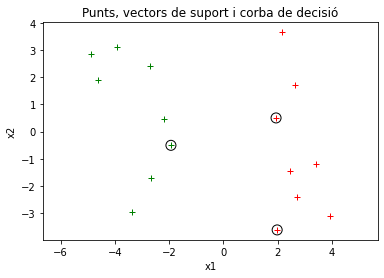

In [21]:
# plot samples, highlighting some of them

plt.title('Punts, vectors de suport i corba de decisió')

plt.plot(X[class_w1_index,0],X[class_w1_index,1],'+r') # class w1
plt.plot(X[class_w2_index,0],X[class_w2_index,1],'+g') # class w2
hil = sv_index # samples to highlight

ax = plt.gca()
ax.scatter(X[hil,0], X[hil,1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('x1')
plt.ylabel('x2')

plt.axis('equal')
plt.show()

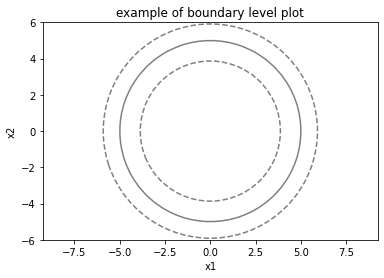

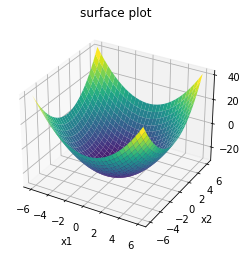

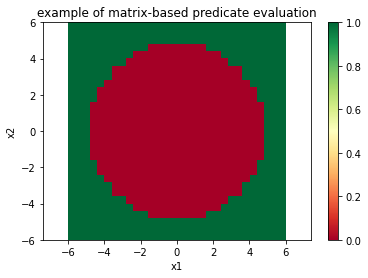

In [22]:
# create grid to evaluate function
xx = np.linspace(-6, 6, 30)
yy = np.linspace(-6, 6, 30)
YY, XX = np.meshgrid(yy, xx)
Z = np.zeros((30 * 30,1))
k = 0
for x1 in xx:
    for x2 in yy:
        Z[k] = x1 ** 2 + x2 ** 2 - 30
        k += 1
    
# plot boundary of levels -15, -5 and +5
plt.figure(2)
ax = plt.gca()
ax.contour(XX,YY,Z.reshape(XX.shape),colors='k',levels=[-15, -5, 5],alpha=0.5,linestyles=['--', '-', '--'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('example of boundary level plot')
plt.show(block=False) # to force visualization

plt.figure(3)
ax = plt.axes(projection='3d')
ax.plot_surface(XX, YY, Z.reshape(XX.shape), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('surface plot')
plt.show(block=False) # to force visualization
# matrix-based predicate evaluation
C = np.where(Z >= -5, 1, 0)

plt.figure(4)
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(-6, 6, -6, 6), cmap='RdYlGn')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('example of matrix-based predicate evaluation')
plt.show(block=False) # to force visualization

c) Compare the results obtained with the ones resulting from the scikit-learn SVC object: i.e. report the
support vectors returned by SVC and the corresponding decision function, and provide the same kind of
plots requested before.

NOTE: the SVC object solves the soft-margin kernel-based 
problem, hence you will have to select the linear
kernel and set constant C with a high value, e.g. $10^{16}$, to force a perfect classification of the training set.